In [1]:
import math

import random
import numpy as np
import torch
from torch import nn
import torchvision.utils
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity

from modules.dataset import LoadMRI, DatasetReconMRI
from modules.dataset import build_loaders
from modules.utils import kspace2image, image2kspace, complex2pseudo, pseudo2real, pseudo2complex

In [2]:
def imsshow(imgs, titles=None, num_col=5, dpi=100, cmap=None, is_colorbar=False, is_ticks=False):
    '''
    assume imgs's shape is (Nslice, Nx, Ny)
    '''
    num_imgs = len(imgs)
    num_row = math.ceil(num_imgs / num_col)
    fig_width = num_col * 3
    if is_colorbar:
        fig_width += num_col * 1.5
    fig_height = num_row * 3
    fig = plt.figure(dpi=dpi, figsize=(fig_width, fig_height))
    for i in range(num_imgs):
        ax = plt.subplot(num_row, num_col, i + 1)
        im = ax.imshow(imgs[i], cmap=cmap)
        if titles:
            plt.title(titles[i])
        if is_colorbar:
            cax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.01, ax.get_position().height])
            plt.colorbar(im, cax=cax)
        if not is_ticks:
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
    plt.close('all')

In [3]:
dataset = LoadMRI('./cine.npz')
CINE_INDEX = random.randint(0, 199)

In [4]:
data_test = DatasetReconMRI(dataset)

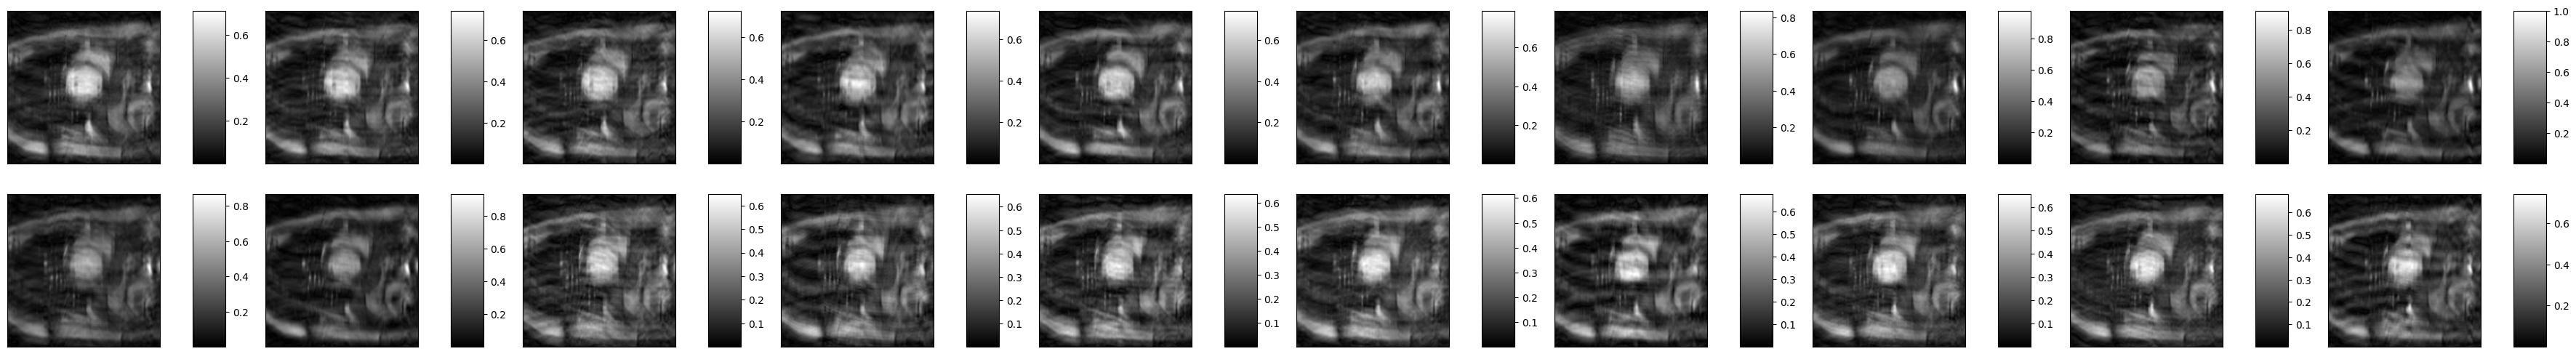

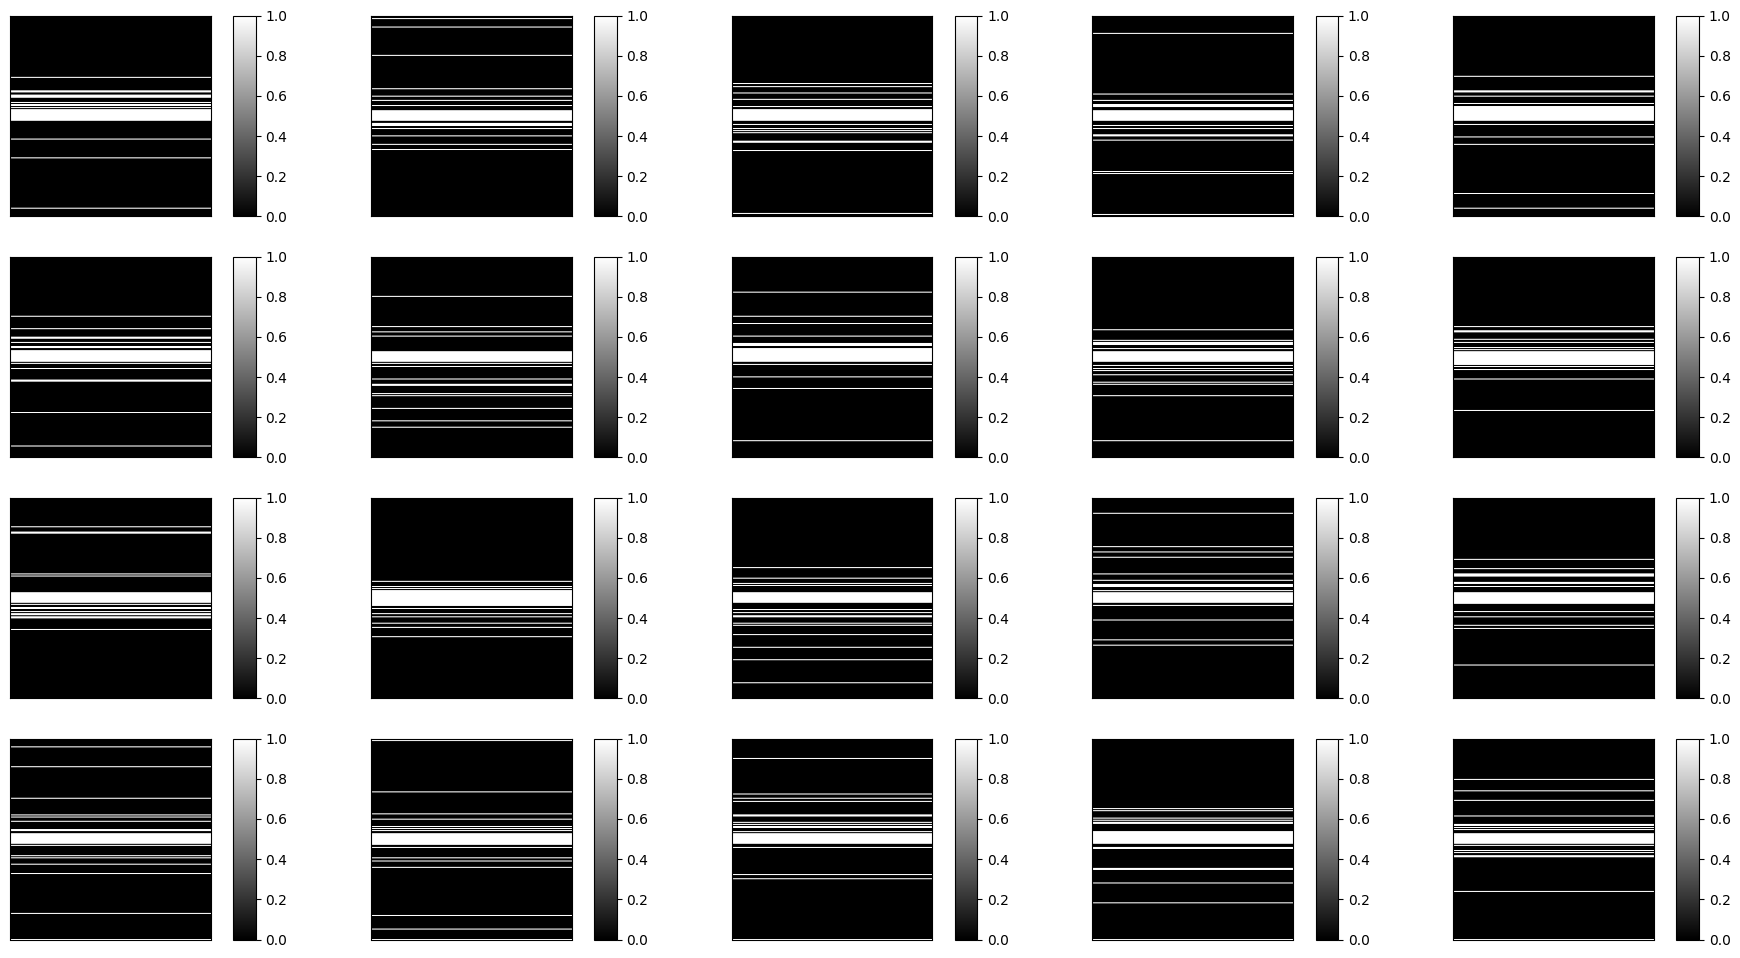

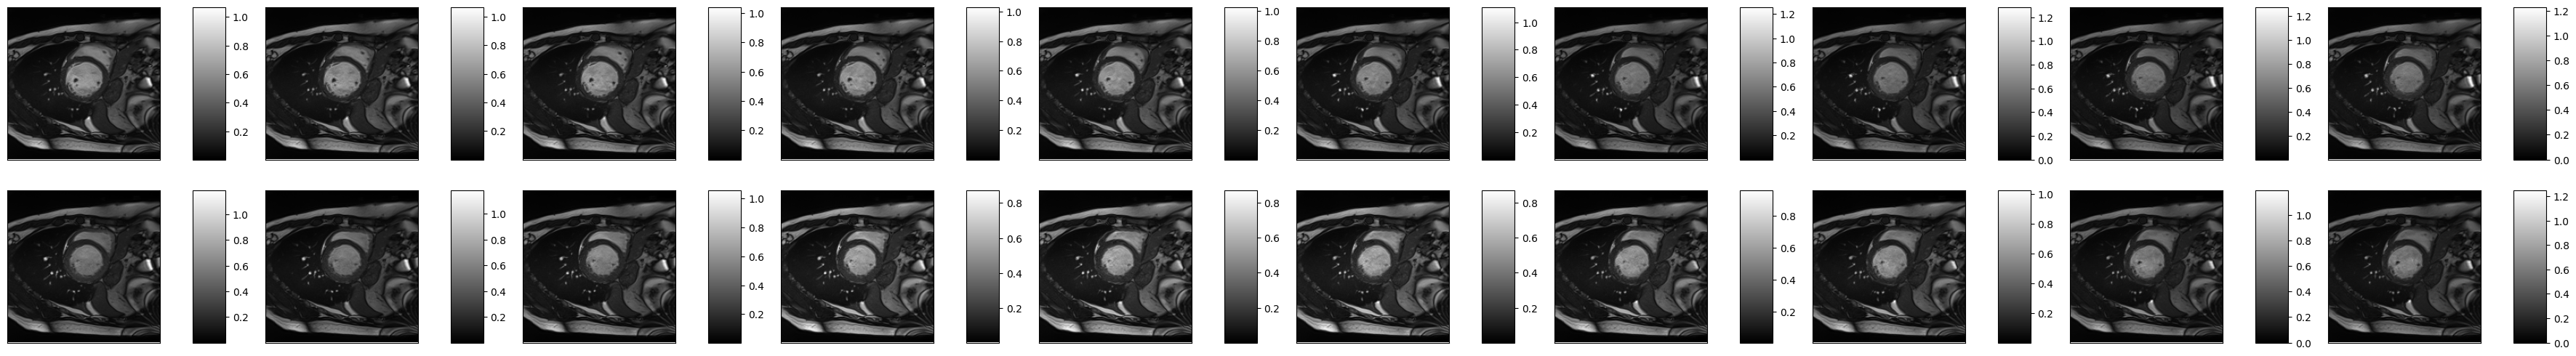

In [5]:
k_und, und_mask, img_gt = data_test[CINE_INDEX]
img_und = np.abs(kspace2image(pseudo2complex(k_und)))

# Try different index range in [0, 1000) to see different images in dataset.
imsshow(img_und, num_col=10, cmap='gray', is_colorbar=True)
imsshow(und_mask, num_col=5, cmap='gray', is_colorbar=True)
imsshow(img_gt, num_col=10, cmap='gray', is_colorbar=True)

In [7]:
TRAIN_INDICES = np.arange(0, 112)
VAL_INDICES = np.arange(112, 140)
TEST_INDICES = np.arange(140, 200)

train_loader, val_loader, test_loader = build_loaders(
    dataset, TRAIN_INDICES, VAL_INDICES, TEST_INDICES,
    batch_size=5  # Reduce this number if your computer does not has large gpu vram
)
print(f"Number of batches for train/val/test: {len(train_loader)}/{len(val_loader)}/{len(test_loader)}")

Number of batches for train/val/test: 23/6/12


In [ ]:
# Network definition
class MultiLayerCNN(nn.Module):
    def __init__(self, n_hidden=64):
        super().__init__()
        self.conv1 = nn.Conv2d(2, n_hidden, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_hidden, n_hidden, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_hidden, n_hidden, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(n_hidden, n_hidden, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(n_hidden, 2, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

    def forward(self, im_und):
        """
        - im_und: tensor[B, C=2, H, W]
        """
        ######################## WRITE YOUR ANSWER BELOW ########################
        im_recon = None
        #########################################################################
        return im_recon


# test a forward
im_mock = torch.randn(1, 2, 256, 256)
net = MultiLayerCNN()
out = net(im_mock)
print(out.shape)
assert (1, 2, 256, 256) == tuple(out.shape)